In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# Sample data
returns_data = {
    'Stock A': [0.02, 0.01, 0.03, 0.01, 0.02, 0.01, 0.02, 0.01, 0.02, 0.01],
    'Stock B': [0.03, 0.02, 0.01, 0.02, 0.01, 0.03, 0.01, -0.01, 0.01, 0.02],
    'Stock C': [0.01, -0.01, 0.02, 0.01, -0.01, 0.02, 0.01, 0.02, 0.03, 0.02],
    'Stock D': [0.02, 0.01, 0.02, -0.01, 0.01, 0.01, 0.03, 0.01, 0.02, 0.01],
    'Stock E': [0.01, 0.03, 0.01, 0.02, 0.02, 0.01, 0.02, 0.01, 0.01, 0.03]
}

# Create a DataFrame from the sample data
ret_matrix = pd.DataFrame(returns_data)
ret_matrix

,Stock A,Stock B,Stock C,Stock D,Stock E
0,0.02,0.03,0.01,0.02,0.01
1,0.01,0.02,-0.01,0.01,0.03
2,0.03,0.01,0.02,0.02,0.01
3,0.01,0.02,0.01,-0.01,0.02
4,0.02,0.01,-0.01,0.01,0.02
5,0.01,0.03,0.02,0.01,0.01
6,0.02,0.01,0.01,0.03,0.02
7,0.01,-0.01,0.02,0.01,0.01
8,0.02,0.01,0.03,0.02,0.01
9,0.01,0.02,0.02,0.01,0.03


In [31]:
# Set the number of layers and holding days
num_layers = 3
holding_days = 5

# Create a DataFrame to store the layer allocation
layer_allocation = pd.DataFrame(pd.read_csv('layer_allcocation_sample.csv'), columns=ret_matrix.columns)
layer_allocation

,Stock A,Stock B,Stock C,Stock D,Stock E
0,0,0,1,0,1
1,0,0,2,2,0
2,0,1,0,1,0
3,1,2,1,2,0
4,2,0,2,0,2
5,0,1,0,1,1
6,0,2,1,0,1
7,0,1,2,0,1
8,0,1,2,2,1
9,2,0,2,1,0


In [32]:
# layer_allocation.to_csv('layer_allcocation_sample.csv')

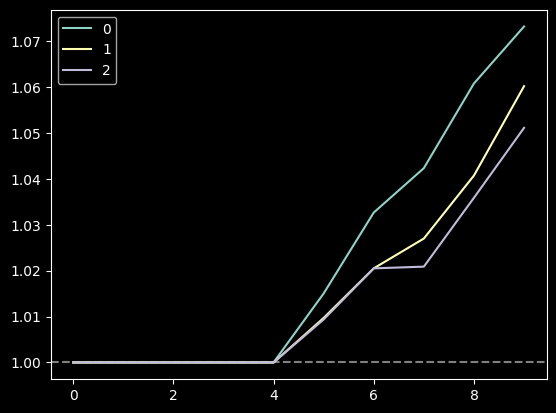

In [33]:
# Iterate through each layer
plt.axhline(y=1, color='grey', linestyle='--')
for layer in range(0, num_layers):
    # Ensure holding stocks
    hold_flag_matrix = layer_allocation.mask(layer_allocation != layer, 0).mask(layer_allocation == layer, 1)

    # Calculate the sum of each line in turn.
    stock_amount_sum = hold_flag_matrix.sum(axis=1)

    # Calculate the weight of each stock. (Average distribution at the same level)
    weight_allocation = hold_flag_matrix.apply(lambda x: x / stock_amount_sum, axis=0).fillna(0)

    # Moving average. Holding days are 5.
    # Because of shift(1), value of each stock each day is the average of last 5 days' weights (exclude today).
    weight_allocation = weight_allocation.shift(1).rolling(holding_days).mean().fillna(0)

    # Calculate the profit using the weight allocation and returns matrix
    profit = (weight_allocation * ret_matrix).sum(axis=1)
    profit = profit.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))

    # Calculate the cumulative product of the profit and plot the results
    profit.cumprod().plot(label=layer, legend=True)
    
    # ( (weight_allocation * ret_matrix).sum(axis=1) + 1 - 0.0003).cumprod().plot(label=layer, legend=True)

In [34]:
layer = 0
# Ensure holding stocks
hold_flag_matrix = layer_allocation.mask(layer_allocation != layer, 0).mask(layer_allocation == layer, 1)
hold_flag_matrix

,Stock A,Stock B,Stock C,Stock D,Stock E
0,1,1,0,1,0
1,1,1,0,0,1
2,1,0,1,0,1
3,0,0,0,0,1
4,0,1,0,1,0
5,1,0,1,0,0
6,1,0,0,1,0
7,1,0,0,1,0
8,1,0,0,0,0
9,0,1,0,0,1


In [35]:
# Calculate the sum of each line in turn.
stock_amount_sum = hold_flag_matrix.sum(axis=1)
stock_amount_sum

0    3
1    3
2    3
3    1
4    2
5    2
6    2
7    2
8    1
9    2
dtype: int64

In [36]:
# Calculate the weight of each stock. (Average distribution at the same level)
weight_allocation = hold_flag_matrix.apply(lambda x: x / stock_amount_sum, axis=0).fillna(0)
weight_allocation

,Stock A,Stock B,Stock C,Stock D,Stock E
0,0.333333,0.333333,0.000000,0.333333,0.000000
1,0.333333,0.333333,0.000000,0.000000,0.333333
2,0.333333,0.000000,0.333333,0.000000,0.333333
3,0.000000,0.000000,0.000000,0.000000,1.000000
4,0.000000,0.500000,0.000000,0.500000,0.000000
5,0.500000,0.000000,0.500000,0.000000,0.000000
6,0.500000,0.000000,0.000000,0.500000,0.000000
7,0.500000,0.000000,0.000000,0.500000,0.000000
8,1.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.500000,0.000000,0.000000,0.500000


In [37]:
# Moving average. Holding days are 5.
# Because of shift(1), value of each stock each day is the average of last 5 days' weights (exclude today).
weight_allocation = weight_allocation.shift(1).rolling(holding_days).mean().fillna(0)
weight_allocation

,Stock A,Stock B,Stock C,Stock D,Stock E
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.200000,0.233333,0.066667,0.166667,0.333333
6,0.233333,0.166667,0.166667,0.100000,0.333333
7,0.266667,0.100000,0.166667,0.200000,0.266667
8,0.300000,0.100000,0.100000,0.300000,0.200000
9,0.500000,0.100000,0.100000,0.300000,0.000000


In [38]:
# After calculating the moving average each day, the sum of weight each day is still one.
weight_allocation.iloc[6, :].sum()
weight_allocation.iloc[8, :].sum()

1.0

In [39]:
# Calculate the profit using the weight allocation and returns matrix
'''
If there is no stock to buy, it means the profit at that day 
    is 0 and equity is not changed.
'''
profit = (weight_allocation * ret_matrix).sum(axis=1)
profit = profit.apply(lambda x: x + 1 if x == 0 else x + (1 - 0.0003))
profit

0    1.000000
1    1.000000
2    1.000000
3    1.000000
4    1.000000
5    1.015033
6    1.017367
7    1.009367
8    1.017700
9    1.011700
dtype: float64

In [40]:
print(weight_allocation.iloc[6, :], '\n')
print(ret_matrix.iloc[6, :], '\n')
print(weight_allocation.iloc[6, :] * ret_matrix.iloc[6, :], '\n')
print((weight_allocation.iloc[6, :] * ret_matrix.iloc[6, :]).sum() + 1 - 0.0003)

Stock A    0.233333
Stock B    0.166667
Stock C    0.166667
Stock D    0.100000
Stock E    0.333333
Name: 6, dtype: float64 

Stock A    0.02
Stock B    0.01
Stock C    0.01
Stock D    0.03
Stock E    0.02
Name: 6, dtype: float64 

Stock A    0.004667
Stock B    0.001667
Stock C    0.001667
Stock D    0.003000
Stock E    0.006667
Name: 6, dtype: float64 

1.0173666666666668


<Axes: >

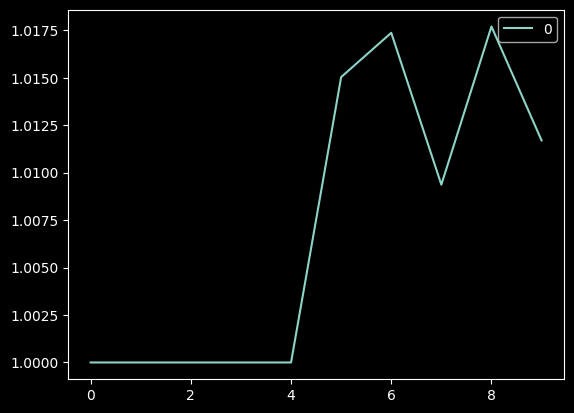

In [41]:
# Calculate the cumulative product of the profit and plot the results
profit.plot(label=layer, legend=True)

<Axes: >

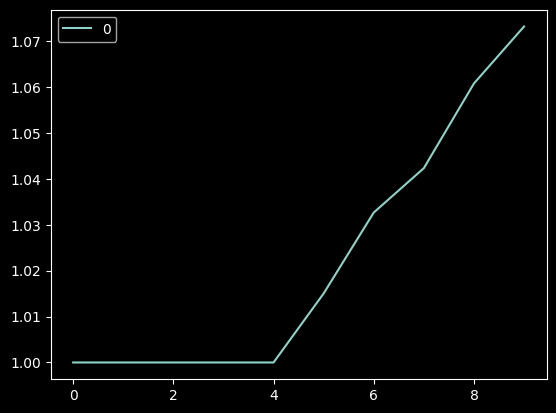

In [42]:
profit.cumprod().plot(label=layer, legend=True)